In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['Label','Text'])
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isna().sum()

Label    0
Text     0
dtype: int64

([<matplotlib.patches.Wedge at 0x221ff7a0b90>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'spam'),
  Text(1.0038714771419537, -0.44971330576360763, 'ham')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4%')])

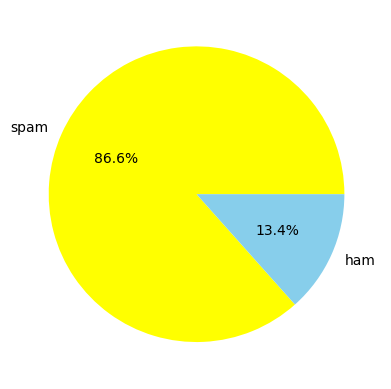

In [4]:
plt.pie( df['Label'].value_counts() , colors = ['yellow','skyblue'] , labels = ['spam','ham'] , autopct = '%1.1f%%' )

In [5]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
# data['label'] = data['label'].map({'spam': 1, 'ham': 0})

In [6]:
df.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.feature_extraction.text import CountVectorizer 

In [8]:
vectorizer = CountVectorizer (stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['Label']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)
x_test.shape

(1393, 8444)

In [10]:
x_train.shape

(4179, 8444)

In [11]:
from sklearn.naive_bayes import MultinomialNB 
mb = MultinomialNB ()
mb.fit( x_train,y_train)

MultinomialNB()

In [12]:
y_pred = mb.predict(x_test)
results = pd.DataFrame( {'actual' : y_test , 'predicted' : y_pred } )
results

,actual,predicted
4202,0,0
4241,0,0
4984,0,0
320,0,0
5498,0,0
...,...,...
819,0,0
4434,0,0
4110,0,0
5234,0,0


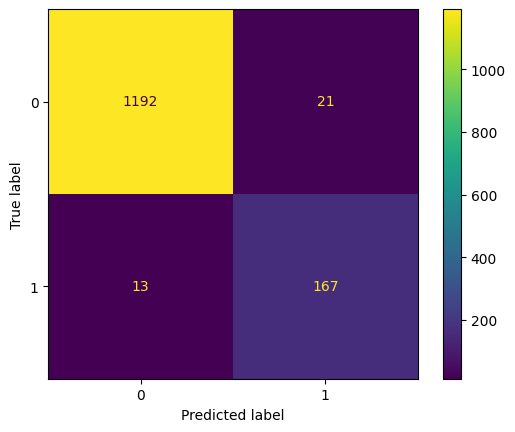

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1213
           1       0.89      0.93      0.91       180

    accuracy                           0.98      1393
   macro avg       0.94      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [15]:
accuracy_score(y_test,y_pred)

0.9755922469490309

In [16]:
# y_pred_2 = mb.predict(x_train)
# results = pd.DataFrame( {'actual' : y_train , 'predicted' : y_pred_2 } )
# results

In [17]:
# from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
# ConfusionMatrixDisplay.from_predictions(y_train,y_pred_2)

In [18]:
# print(classification_report(y_train,y_pred_2))

In [19]:
# accuracy_score(y_train,y_pred_2)

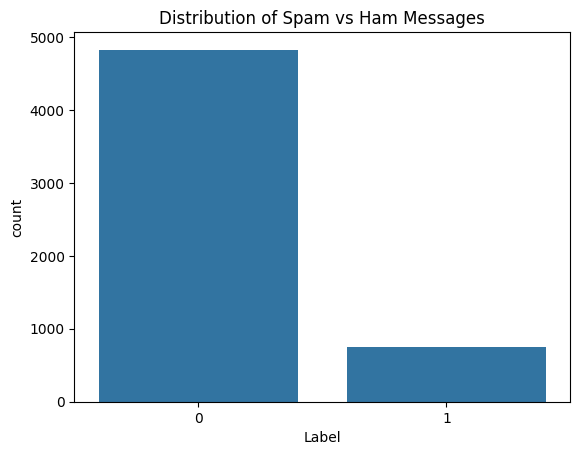

In [20]:
sns.countplot(x='Label', data=df)
#sns.countplot(x=y)
plt.title("Distribution of Spam vs Ham Messages")
plt.show()

In [21]:
def check ():
    take_input = input("Enter the String of sms :- ")
    Trans_mat = vectorizer.transform([take_input])
    pred_output = mb.predict(Trans_mat[0])
    if pred_output == 0  :
        print("It is ham") 
    else :
        print("It is spam")

In [22]:
check()

Enter the String of sms :-  chandu champion


It is ham


In [23]:
sample_msg = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [24]:
sample_vect = vectorizer.transform(sample_msg)
pred_label = mb.predict(sample_vect)
if pred_label == 0 :
    print("it is ham")
else :
    print("it is spam")

it is spam
